In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
#아이리스 품종 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/자연어처리 스터디/Iris.csv",encoding='latin1')
print("샘플의 개수 :", len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
#서로다른 species 갯수 추출하기
print("품종종류 :",data["Species"].unique(),sep="\n")

품종종류 :
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#각 특성에 관한 분포확인
sns.set(style="ticks",color_codes=True)
g=sns.pairplot(data,hue="Species",palette="husl")

<ipython-input-21-0f6b83e94011>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Species'], y=data['SepalWidthCm'], ci=None)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

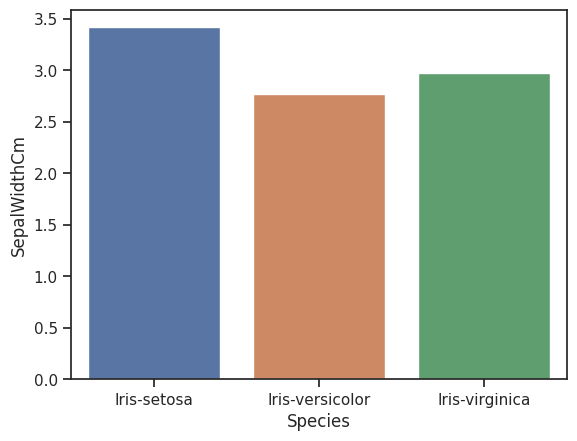

In [21]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x=data['Species'], y=data['SepalWidthCm'], ci=None)

<Axes: >

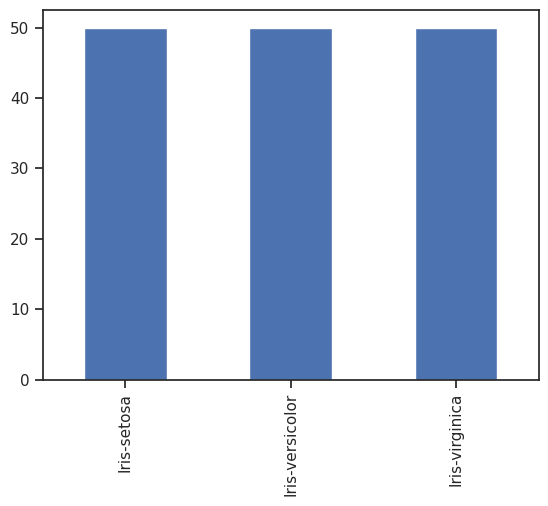

In [22]:
#각 품종이 몇 개씩 있는가
data['Species'].value_counts().plot(kind="bar")

<Axes: >

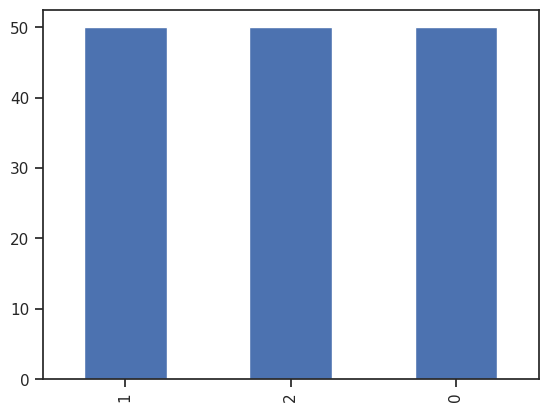

In [23]:
#정수인코딩
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data["Species"]=data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [25]:
#종속변수 독립변수 분리
# X 데이터. 특성은 총 4개.
data_x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_x[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [26]:
#훈련테스트, 테스트 데이터 분리 후 원핫 인코딩
(x_train,x_test,y_train,y_test)=train_test_split(data_x, data_y, train_size=0.8, random_state=1)

#원_핫 인코딩
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(3,input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=30,batch_size=1,validation_data=(x_test,y_test))

Epoch 1/30
120/120 [==============================] - 1s 3ms/step - loss: 6.1668 - accuracy: 0.3250 - val_loss: 4.1485 - val_accuracy: 0.3667
Epoch 2/30
120/120 [==============================] - 0s 2ms/step - loss: 4.3484 - accuracy: 0.3250 - val_loss: 2.5640 - val_accuracy: 0.3667
Epoch 3/30
120/120 [==============================] - 0s 2ms/step - loss: 2.9463 - accuracy: 0.3250 - val_loss: 1.6751 - val_accuracy: 0.3667
Epoch 4/30
120/120 [==============================] - 0s 2ms/step - loss: 2.0834 - accuracy: 0.3833 - val_loss: 1.1734 - val_accuracy: 0.6000
Epoch 5/30
120/120 [==============================] - 0s 2ms/step - loss: 1.4346 - accuracy: 0.4833 - val_loss: 0.8908 - val_accuracy: 0.6667
Epoch 6/30
120/120 [==============================] - 0s 2ms/step - loss: 1.0400 - accuracy: 0.5250 - val_loss: 0.8064 - val_accuracy: 0.7667
Epoch 7/30
120/120 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.4500 - val_loss: 0.8215 - val_accuracy: 0.4000
Epoch 

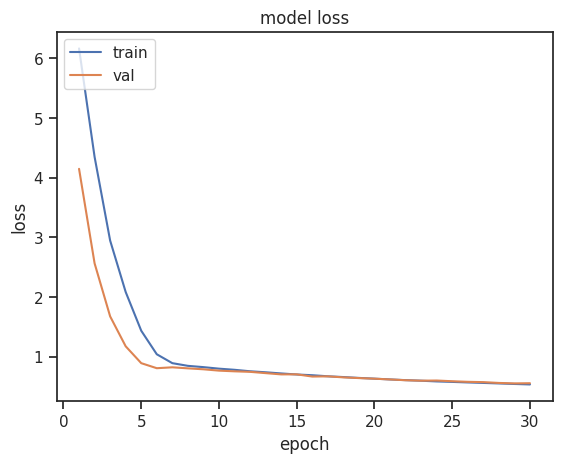

In [39]:
epochs=range(1,len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

1/1 [==============================] - 0s 188ms/step - loss: 0.5546 - accuracy: 0.5667

 테스트 정확도: 0.5667
